# Benchmark Figure on OpenML-CC18

## Setup

In [1]:
import ast
import numpy as np
import openml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Define color palette
sns.set(
    color_codes=True, palette="bright", style="white", context="talk", font_scale=1.5
)

In [3]:
def plot_acc(col, ls, pos, n_train):
    if pos == 0:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, label=legends[i], c=colors[i], lw=5)
    else:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, c=colors[i], lw=5)

In [4]:
directory = "../benchmarks/results/"
prefixes = ["rf/", "sdf/"]
legends = [
    "random forest",
    "stream decision forest",
]
colors = ["b", "r"]
datasets = openml.study.get_suite("OpenML-CC18").data

## Plot

In [5]:
# Show concatenated time for batch estimators
concat = True

acc_ls = []
time_ls = []
ranges = []
for dataset in datasets:
    acc_l = []
    time_l = []

    for prefix in prefixes:
        f = open(directory + prefix + "cc18_acc.json")
        acc = np.mean(json.load(f)[str(dataset)], axis=0)
        f.close()
        acc_l.append(acc)

        f = open(directory + prefix + "cc18_train_t.json")
        time = np.mean(json.load(f)[str(dataset)], axis=0)
        f.close()

        if concat and prefix == "rf/":
            for j in range(1, len(time)):
                time[j] += time[j - 1]

        time_l.append(time)

    acc_ls.append(acc_l)
    time_ls.append(time_l)
    ranges.append(len(acc_l[0]))

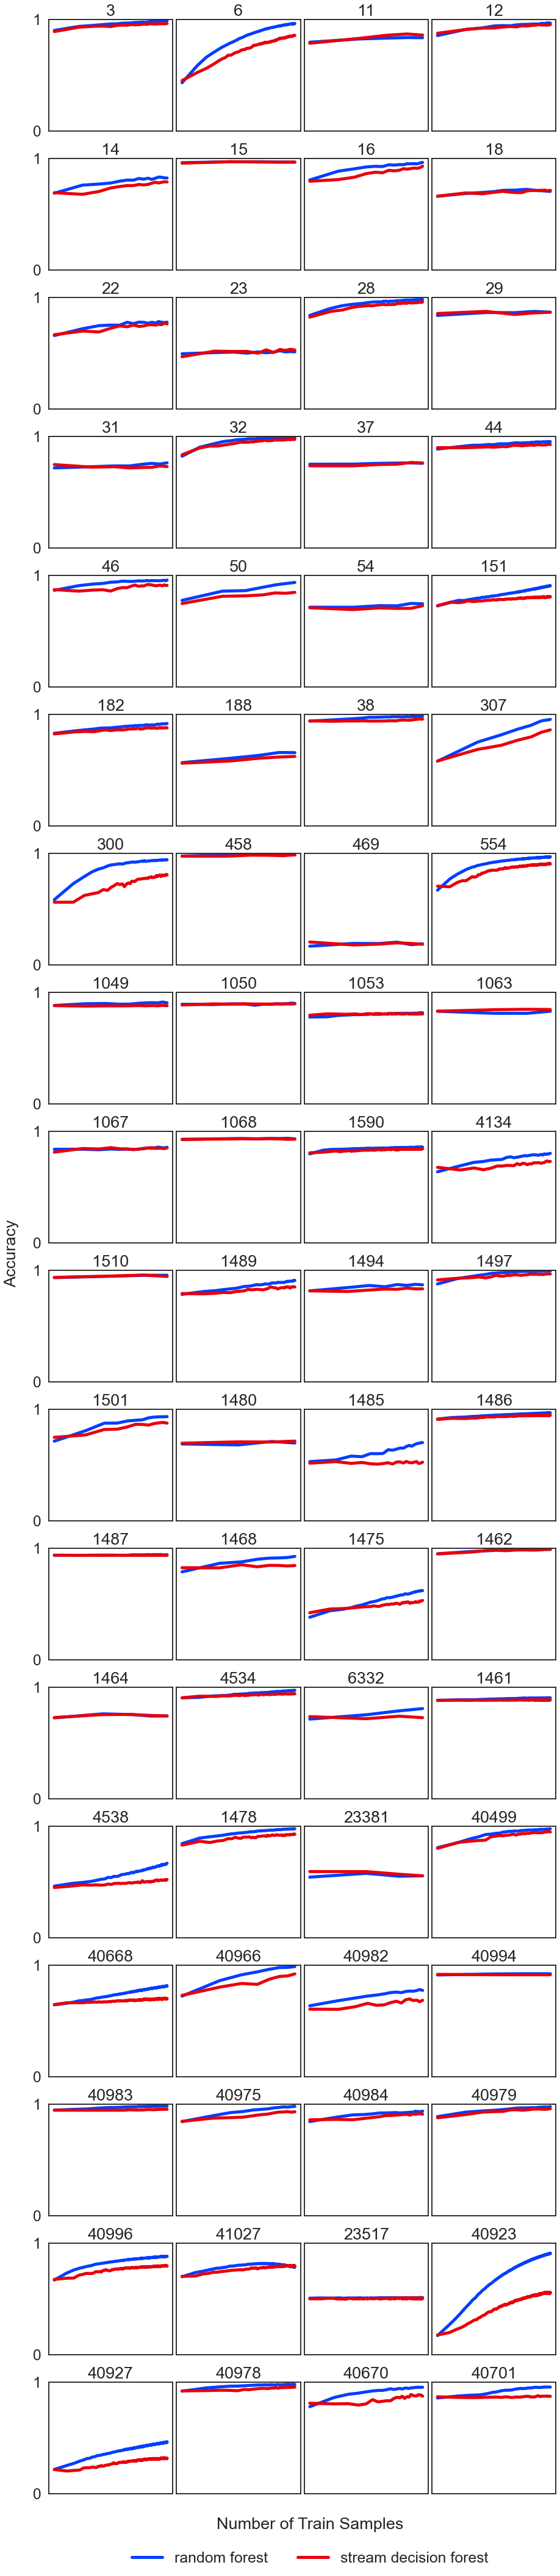

In [6]:
fig, ax = plt.subplots(nrows=18, ncols=4, figsize=(12, 57), constrained_layout=True)
fig.text(0.53, -0.01, "Number of Train Samples", ha="center")
fig.text(-0.05, 0.5, "Accuracy", va="center", rotation="vertical")
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-4, 1e5]]
yticks = [[0, 1], [1e-4, 1e-1, 1e2, 1e5]]

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        count = 4 * i + j
        n_train = range(100, (ranges[count] + 1) * 100, 100)

        # Label x axis and plot figures
        plot_acc(col, acc_ls, count, n_train)

        # Adjust x axis
        col.set_xscale("log")
        col.tick_params(
            axis="x", which="both", bottom=False, top=False, labelbottom=False
        )

        # Adjust y axis
        col.set_ylim(ylimits[0])
        if j == 0:
            col.set_yticks(yticks[0])
        else:
            col.set_yticks([])

        # Adjust overall
        col.set_title(datasets[count])


fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.03),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/cc18.pdf", transparent=True, bbox_inches="tight")